In [4]:
!pip install --upgrade wbgapi
!pip install --upgrade yfinance

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [6]:
s=pd.Series(np.random.randn(4),name='daily returns')
s

0   -2.380801
1    0.547028
2    0.799308
3    1.251036
Name: daily returns, dtype: float64

In [7]:
s*10

0   -23.808010
1     5.470277
2     7.993085
3    12.510359
Name: daily returns, dtype: float64

In [8]:
np.abs(s)

0    2.380801
1    0.547028
2    0.799308
3    1.251036
Name: daily returns, dtype: float64

In [9]:
np.cos(s)

0   -0.724290
1    0.854074
2    0.697203
3    0.314339
Name: daily returns, dtype: float64

In [10]:
s.describe

<bound method NDFrame.describe of 0   -2.380801
1    0.547028
2    0.799308
3    1.251036
Name: daily returns, dtype: float64>

In [11]:
s.index=[1,2,3,4]
s

1   -2.380801
2    0.547028
3    0.799308
4    1.251036
Name: daily returns, dtype: float64

In [12]:
#也可以是string
s.index=['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -2.380801
AAPL    0.547028
MSFT    0.799308
GOOG    1.251036
Name: daily returns, dtype: float64

In [13]:
dict_s={'a':1,'b':2}
dict_s['b']=4
dict_s['c']=3
dict_s

{'a': 1, 'b': 4, 'c': 3}

In [14]:
s['AMZN']

-2.380800982795253

In [15]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.547028
MSFT    0.799308
GOOG    1.251036
Name: daily returns, dtype: float64

In [16]:
'AAPL' in s

True

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [18]:
df

country country isocode  year          POP       XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.999500  2.950722e+05   
1      Australia             AUS  2000    19053.186   1.724830  5.418047e+05   
2          India             IND  2000  1006300.297  44.941600  1.728144e+06   
3         Israel             ISR  2000     6114.570   4.077330  1.292539e+05   
4         Malawi             MWI  2000    11801.505  59.543808  5.026222e+03   
5   South Africa             ZAF  2000    45064.098   6.939830  2.272424e+05   
6  United States             USA  2000   282171.957   1.000000  9.898700e+06   
7        Uruguay             URY  2000     3219.793  12.099592  2.525596e+04   

          cc         cg  
0  75.716805   5.578804  
1  67.759026   6.720098  
2  64.575551  14.072206  
3  64.436451  10.266688  
4  74.707624  11.658954  
5  72.718710   5.726546  
6  72.347054   6.032454  
7  78.978740   5.108068

In [19]:
df[2:5]#从第3行到第5行

country country isocode  year          POP       XRAT         tcgdp  \
2   India             IND  2000  1006300.297  44.941600  1.728144e+06   
3  Israel             ISR  2000     6114.570   4.077330  1.292539e+05   
4  Malawi             MWI  2000    11801.505  59.543808  5.026222e+03   

          cc         cg  
2  64.575551  14.072206  
3  64.436451  10.266688  
4  74.707624  11.658954

In [20]:
df['year'] #用于单列（返回 Series）

0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
Name: year, dtype: int64

In [21]:
df[['country', 'tcgdp','year']] #用于多列（返回 DataFrame）
#显示顺序按照括号里的顺序

country         tcgdp  year
0      Argentina  2.950722e+05  2000
1      Australia  5.418047e+05  2000
2          India  1.728144e+06  2000
3         Israel  1.292539e+05  2000
4         Malawi  5.026222e+03  2000
5   South Africa  2.272424e+05  2000
6  United States  9.898700e+06  2000
7        Uruguay  2.525596e+04  2000

In [22]:
df.iloc[2:5, 0:4]

country country isocode  year          POP
2   India             IND  2000  1006300.297
3  Israel             ISR  2000     6114.570
4  Malawi             MWI  2000    11801.505

In [23]:
df.iloc[3:6,1:7]

country isocode  year        POP       XRAT          tcgdp         cc
3             ISR  2000   6114.570   4.077330  129253.894230  64.436451
4             MWI  2000  11801.505  59.543808    5026.221784  74.707624
5             ZAF  2000  45064.098   6.939830  227242.369490  72.718710

In [24]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

country         tcgdp
2   India  1.728144e+06
3  Israel  1.292539e+05
4  Malawi  5.026222e+03

In [25]:
df.POP>=20000

0     True
1    False
2     True
3    False
4    False
5     True
6     True
7    False
Name: POP, dtype: bool

In [26]:
df

country country isocode  year          POP       XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.999500  2.950722e+05   
1      Australia             AUS  2000    19053.186   1.724830  5.418047e+05   
2          India             IND  2000  1006300.297  44.941600  1.728144e+06   
3         Israel             ISR  2000     6114.570   4.077330  1.292539e+05   
4         Malawi             MWI  2000    11801.505  59.543808  5.026222e+03   
5   South Africa             ZAF  2000    45064.098   6.939830  2.272424e+05   
6  United States             USA  2000   282171.957   1.000000  9.898700e+06   
7        Uruguay             URY  2000     3219.793  12.099592  2.525596e+04   

          cc         cg  
0  75.716805   5.578804  
1  67.759026   6.720098  
2  64.575551  14.072206  
3  64.436451  10.266688  
4  74.707624  11.658954  
5  72.718710   5.726546  
6  72.347054   6.032454  
7  78.978740   5.108068

In [27]:
df[df.POP>=20000]

country country isocode  year          POP      XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.99950  2.950722e+05   
2          India             IND  2000  1006300.297  44.94160  1.728144e+06   
5   South Africa             ZAF  2000    45064.098   6.93983  2.272424e+05   
6  United States             USA  2000   282171.957   1.00000  9.898700e+06   

          cc         cg  
0  75.716805   5.578804  
2  64.575551  14.072206  
5  72.718710   5.726546  
6  72.347054   6.032454

In [28]:
df[(df.country.isin(['Argentina', 'India', 'South Africa'])) & (df.POP > 40000)]
#注意不可以用and

country country isocode  year          POP      XRAT         tcgdp  \
2         India             IND  2000  1006300.297  44.94160  1.728144e+06   
5  South Africa             ZAF  2000    45064.098   6.93983  2.272424e+05   

          cc         cg  
2  64.575551  14.072206  
5  72.718710   5.726546

In [29]:
# the above is equivalent to 
df.query("POP >= 20000")

country country isocode  year          POP      XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.99950  2.950722e+05   
2          India             IND  2000  1006300.297  44.94160  1.728144e+06   
5   South Africa             ZAF  2000    45064.098   6.93983  2.272424e+05   
6  United States             USA  2000   282171.957   1.00000  9.898700e+06   

          cc         cg  
0  75.716805   5.578804  
2  64.575551  14.072206  
5  72.718710   5.726546  
6  72.347054   6.032454

In [30]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000")

country country isocode  year          POP      XRAT         tcgdp  \
2         India             IND  2000  1006300.297  44.94160  1.728144e+06   
5  South Africa             ZAF  2000    45064.098   6.93983  2.272424e+05   

          cc         cg  
2  64.575551  14.072206  
5  72.718710   5.726546

In [31]:
df.loc[df.cc == max(df.cc)]

country country isocode  year       POP       XRAT         tcgdp        cc  \
7  Uruguay             URY  2000  3219.793  12.099592  25255.961693  78.97874   

         cg  
7  5.108068

In [32]:
df.loc[(df.cc + df.cg >= 80) & (df.POP <= 20000), ['country', 'year', 'POP']]

country  year        POP
4   Malawi  2000  11801.505
7  Uruguay  2000   3219.793

In [38]:
df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max) #被当成浮点数
#所以显示结果是科学计数法

year     2.000000e+03
POP      1.006300e+06
XRAT     5.954381e+01
tcgdp    9.898700e+06
cc       7.897874e+01
cg       1.407221e+01
dtype: float64

In [48]:
df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].astype(int).apply(max)

year        2000
POP      1006300
XRAT          59
tcgdp    9898700
cc            78
cg            14
dtype: int64

In [50]:
complexCondition = df.apply(
    lambda row: row.POP > 40000 if row.country in ['Argentina', 'India', 'South Africa'] else row.POP < 20000, 
    axis=1), ['country', 'year', 'POP', 'XRAT', 'tcgdp']

In [51]:
complexCondition

(0    False
 1     True
 2     True
 3     True
 4     True
 5     True
 6    False
 7     True
 dtype: bool,
 ['country', 'year', 'POP', 'XRAT', 'tcgdp'])

In [52]:
df.loc[complexCondition]

country  year          POP       XRAT         tcgdp
1     Australia  2000    19053.186   1.724830  5.418047e+05
2         India  2000  1006300.297  44.941600  1.728144e+06
3        Israel  2000     6114.570   4.077330  1.292539e+05
4        Malawi  2000    11801.505  59.543808  5.026222e+03
5  South Africa  2000    45064.098   6.939830  2.272424e+05
7       Uruguay  2000     3219.793  12.099592  2.525596e+04

In [54]:
df.where(df.POP >= 20000, False)

country country isocode   year          POP     XRAT         tcgdp  \
0      Argentina             ARG   2000    37335.653   0.9995  295072.21869   
1          False           False  False        False    False         False   
2          India             IND   2000  1006300.297  44.9416  1728144.3748   
3          False           False  False        False    False         False   
4          False           False  False        False    False         False   
5   South Africa             ZAF   2000    45064.098  6.93983  227242.36949   
6  United States             USA   2000   282171.957      1.0     9898700.0   
7          False           False  False        False    False         False   

          cc         cg  
0  75.716805   5.578804  
1      False      False  
2  64.575551  14.072206  
3      False      False  
4      False      False  
5   72.71871   5.726546  
6  72.347054   6.032454  
7      False      False

In [55]:
df.loc[df.cg == max(df.cg), 'cg'] = np.nan
df

country country isocode  year          POP       XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.999500  2.950722e+05   
1      Australia             AUS  2000    19053.186   1.724830  5.418047e+05   
2          India             IND  2000  1006300.297  44.941600  1.728144e+06   
3         Israel             ISR  2000     6114.570   4.077330  1.292539e+05   
4         Malawi             MWI  2000    11801.505  59.543808  5.026222e+03   
5   South Africa             ZAF  2000    45064.098   6.939830  2.272424e+05   
6  United States             USA  2000   282171.957   1.000000  9.898700e+06   
7        Uruguay             URY  2000     3219.793  12.099592  2.525596e+04   

          cc         cg  
0  75.716805   5.578804  
1  67.759026   6.720098  
2  64.575551        NaN  
3  64.436451  10.266688  
4  74.707624  11.658954  
5  72.718710   5.726546  
6  72.347054   6.032454  
7  78.978740   5.108068

In [56]:
def update_row(row):
    # modify POP
    row.POP = np.nan if row.POP<= 10000 else row.POP

    # modify XRAT
    row.XRAT = row.XRAT / 10
    return row

df.apply(update_row, axis=1) 

country country isocode  year          POP      XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653  0.099950  2.950722e+05   
1      Australia             AUS  2000    19053.186  0.172483  5.418047e+05   
2          India             IND  2000  1006300.297  4.494160  1.728144e+06   
3         Israel             ISR  2000          NaN  0.407733  1.292539e+05   
4         Malawi             MWI  2000    11801.505  5.954381  5.026222e+03   
5   South Africa             ZAF  2000    45064.098  0.693983  2.272424e+05   
6  United States             USA  2000   282171.957  0.100000  9.898700e+06   
7        Uruguay             URY  2000          NaN  1.209959  2.525596e+04   

          cc         cg  
0  75.716805   5.578804  
1  67.759026   6.720098  
2  64.575551        NaN  
3  64.436451  10.266688  
4  74.707624  11.658954  
5  72.718710   5.726546  
6  72.347054   6.032454  
7  78.978740   5.108068

In [60]:
# Round all decimal numbers to 2 decimal places
df.map(lambda x : round(x,2) if type(x)!=str else x)

country country isocode  year         POP   XRAT       tcgdp     cc  \
0      Argentina             ARG  2000    37335.65   1.00   295072.22  75.72   
1      Australia             AUS  2000    19053.19   1.72   541804.65  67.76   
2          India             IND  2000  1006300.30  44.94  1728144.37  64.58   
3         Israel             ISR  2000     6114.57   4.08   129253.89  64.44   
4         Malawi             MWI  2000    11801.50  59.54     5026.22  74.71   
5   South Africa             ZAF  2000    45064.10   6.94   227242.37  72.72   
6  United States             USA  2000   282171.96   1.00  9898700.00  72.35   
7        Uruguay             URY  2000     3219.79  12.10    25255.96  78.98   

      cg  
0   5.58  
1   6.72  
2    NaN  
3  10.27  
4  11.66  
5   5.73  
6   6.03  
7   5.11

In [62]:
# replace all NaN values by 0
def replace_nan(x):
    if type(x)!=str:
        return  0 if np.isnan(x) else x
    else:
        return x


df.map(replace_nan)

country country isocode  year          POP       XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.999500  2.950722e+05   
1      Australia             AUS  2000    19053.186   1.724830  5.418047e+05   
2          India             IND  2000  1006300.297  44.941600  1.728144e+06   
3         Israel             ISR  2000     6114.570   4.077330  1.292539e+05   
4         Malawi             MWI  2000    11801.505  59.543808  5.026222e+03   
5   South Africa             ZAF  2000    45064.098   6.939830  2.272424e+05   
6  United States             USA  2000   282171.957   1.000000  9.898700e+06   
7        Uruguay             URY  2000     3219.793  12.099592  2.525596e+04   

          cc         cg  
0  75.716805   5.578804  
1  67.759026   6.720098  
2  64.575551   0.000000  
3  64.436451  10.266688  
4  74.707624  11.658954  
5  72.718710   5.726546  
6  72.347054   6.032454  
7  78.978740   5.108068

In [63]:
df = df.fillna(df.iloc[:,2:8].mean())
df

country country isocode  year          POP       XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.999500  2.950722e+05   
1      Australia             AUS  2000    19053.186   1.724830  5.418047e+05   
2          India             IND  2000  1006300.297  44.941600  1.728144e+06   
3         Israel             ISR  2000     6114.570   4.077330  1.292539e+05   
4         Malawi             MWI  2000    11801.505  59.543808  5.026222e+03   
5   South Africa             ZAF  2000    45064.098   6.939830  2.272424e+05   
6  United States             USA  2000   282171.957   1.000000  9.898700e+06   
7        Uruguay             URY  2000     3219.793  12.099592  2.525596e+04   

          cc         cg  
0  75.716805   5.578804  
1  67.759026   6.720098  
2  64.575551   7.298802  
3  64.436451  10.266688  
4  74.707624  11.658954  
5  72.718710   5.726546  
6  72.347054   6.032454  
7  78.978740   5.108068

In [64]:
df = df[['country', 'POP', 'tcgdp']]
df

country          POP         tcgdp
0      Argentina    37335.653  2.950722e+05
1      Australia    19053.186  5.418047e+05
2          India  1006300.297  1.728144e+06
3         Israel     6114.570  1.292539e+05
4         Malawi    11801.505  5.026222e+03
5   South Africa    45064.098  2.272424e+05
6  United States   282171.957  9.898700e+06
7        Uruguay     3219.793  2.525596e+04

In [65]:
df = df.set_index('country')
df.columns = 'population', 'total GDP'
df['population'] = df['population'] * 1e3
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

population     total GDP    GDP percap
country                                                
Argentina      3.733565e+07  2.950722e+05   7903.229085
Australia      1.905319e+07  5.418047e+05  28436.433261
India          1.006300e+09  1.728144e+06   1717.324719
Israel         6.114570e+06  1.292539e+05  21138.672749
Malawi         1.180150e+07  5.026222e+03    425.896679
South Africa   4.506410e+07  2.272424e+05   5042.647686
United States  2.821720e+08  9.898700e+06  35080.381854
Uruguay        3.219793e+06  2.525596e+04   7843.970620

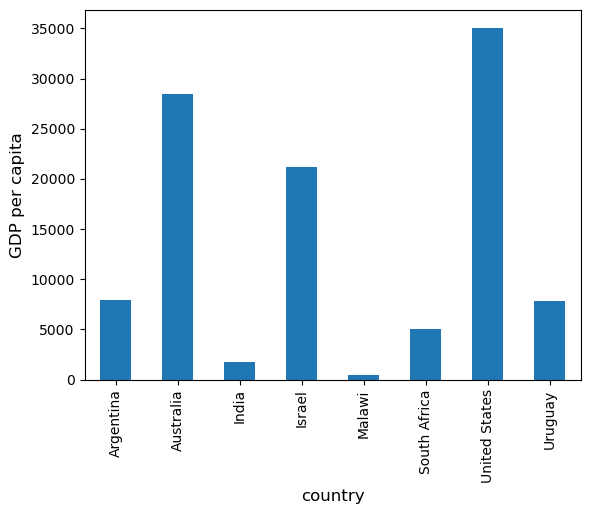

In [66]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [67]:
df = df.sort_values(by='GDP percap', ascending=False)
df

population     total GDP    GDP percap
country                                                
United States  2.821720e+08  9.898700e+06  35080.381854
Australia      1.905319e+07  5.418047e+05  28436.433261
Israel         6.114570e+06  1.292539e+05  21138.672749
Argentina      3.733565e+07  2.950722e+05   7903.229085
Uruguay        3.219793e+06  2.525596e+04   7843.970620
South Africa   4.506410e+07  2.272424e+05   5042.647686
India          1.006300e+09  1.728144e+06   1717.324719
Malawi         1.180150e+07  5.026222e+03    425.896679

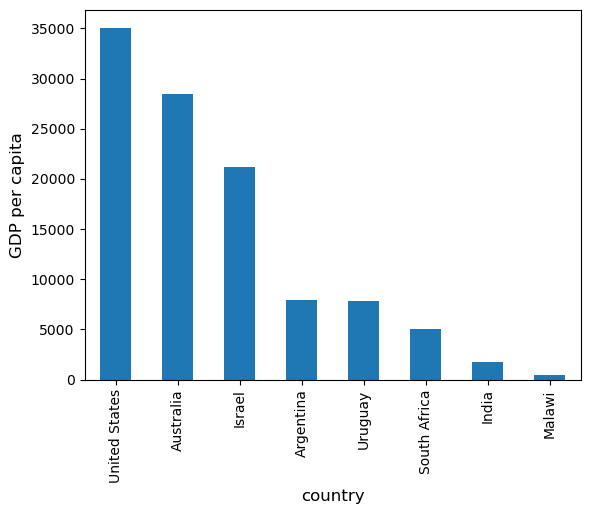

In [68]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [ ]:
#爬虫

In [69]:
r = requests.get('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-07-29&revision_date=2024-07-29&nd=1948-01-01')

In [70]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-07-29&revision_date=2024-07-29&nd=1948-01-01'
source = requests.get(url).content.decode().split("\n")
source[0]

'observation_date,UNRATE'

In [71]:
source[1]

'1948-01-01,3.4'

In [72]:
source[2]

'1948-02-01,3.8'

In [73]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [74]:
type(data)

pandas.core.frame.DataFrame

In [75]:
data.head()  # A useful method to get a quick look at a data frame

UNRATE
observation_date        
1948-01-01           3.4
1948-02-01           3.8
1948-03-01           4.0
1948-04-01           3.9
1948-05-01           3.5

In [76]:
pd.set_option('display.precision', 1)
data.describe()  # Your output might differ slightly

UNRATE
count   918.0
mean      5.7
std       1.7
min       2.5
25%       4.4
50%       5.5
75%       6.7
max      14.8

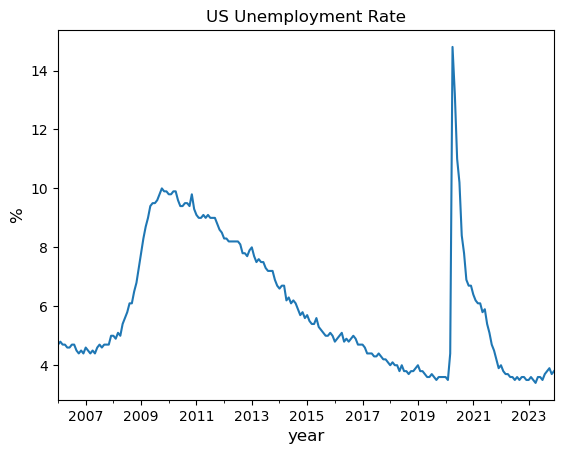

In [78]:
ax = data['2006':'2023'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show() #hhhhh 2020太恐怖了

In [79]:
import wbgapi as wb
wb.series.info('GC.DOD.TOTL.GD.ZS')

id                 value
-----------------  -----------------------------------------
GC.DOD.TOTL.GD.ZS  Central government debt, total (% of GDP)
                   1 elements

In [83]:
govt_debt = wb.data.DataFrame('GC.DOD.TOTL.GD.ZS', economy=['USA','AUS'], time=range(2005,2023))
govt_debt = govt_debt.T    # move years from columns to rows for plotting

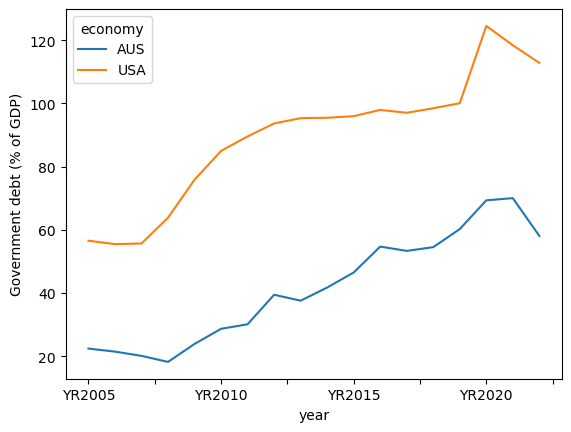

In [84]:
govt_debt.plot(xlabel='year', ylabel='Government debt (% of GDP)');

In [85]:
import datetime as dt
import yfinance as yf

In [87]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'C': 'Citigroup',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google'}